In [1]:
%config IPCompleter.use_jedi = False

In [2]:
import os
import json
import numpy as np
import requests
import time
import cv2
import base64
import random
import matplotlib.pyplot as plt

from tqdm import tqdm
from IPython.display import display, HTML
from k12libs.utils.nb_easy import RACEURL

In [3]:
display(HTML('<style>.container { width:%d%% !important; }</style>' % 90))

In [4]:
API_INFERENCE = f'{RACEURL}/raceai/framework/inference'
API_INFERENCE

'http://116.85.5.40:9119/raceai/framework/inference'

In [5]:
API_POPMSG = f'{RACEURL}/raceai/private/popmsg'
API_POPMSG 

'http://116.85.5.40:9119/raceai/private/popmsg'

In [6]:
MODEL_TASK = 'zmq.cr.resnet18.inference'
MSGKEY = 'zmq.cr.pl.test'
IMG_ROOT = '/raceai/data/datasets/cleaner_robot/imgs'

# "label_names": [
#     "ring",
#     "cable",
#     "other"
# ],

## 批量测试

In [7]:
cfgdata = '''{
    "task": "%s",
    "cfg": {
        "pigeon": {
            "msgkey": "%s",
            "user": "1",
            "uuid": "100"
        },
        "data": {
            "class_name": "raceai.data.process.PathListDataLoader",
            "params": {
                "data_source": [
                    "cable/cable_1.jpg",
                    "other/paper_1.jpg",
                    "ring/ring_1.jpg"
                ],
                "dataset": {
                    "class_name": "raceai.data.PredictListImageDataset",
                    "params": {
                        "data_prefix": "%s",
                        "input_size": 224
                    }
                },
                "sample": {
                    "batch_size": 32,
                    "num_workers": 1,
                }
            }
        }
    }
}''' % (MODEL_TASK, MSGKEY,IMG_ROOT)

### 输入

只需要修改: `data_source` 和 `data_prefix`

```json
{
    "task": "zmq.cr.resnet18.inference",   // 任务topic, 订阅此topic的后端服务来处理此次请求
    "cfg": {
        "pigeon": {                        // 可以传输任何需要异步返回的信息
            "msgkey": "zmq.cr.pl.test",    // 异步数据的队列key
            "user": "1",
            "uuid": "100"
        },
        "data": {
            "class_name": "raceai.data.process.PathListDataLoader",
            "params": {
                "data_source": [
                    "cable/cable_1.jpg",
                    "other/paper_1.jpg",
                    "ring/ring_1.jpg"
                ],
                "dataset": {
                    "class_name": "raceai.data.PredictListImageDataset",
                    "params": {
                        "data_prefix": "/raceai/data/datasets/cleaner_robot/imgs",
                        "input_size": 224
                    }
                },
                "sample": {
                    "batch_size": 32,
                    "num_workers": 4,
                }
            }
        }
    }
}
```

In [14]:
reqdata = eval(cfgdata)
json.loads(requests.get(url=f'{API_POPMSG}?key={MSGKEY}').text)
json.loads(requests.post(url=API_INFERENCE, json=reqdata).text)
time.sleep(3)

In [15]:
json.loads(requests.get(url=f'{API_POPMSG}?key={MSGKEY}').text)

[{'pigeon': {'msgkey': 'zmq.cr.pl.test', 'user': '1', 'uuid': '100'},
  'task': 'zmq.cr.resnet18.inference',
  'errno': 0,
  'result': [{'image_path': '/raceai/data/datasets/cleaner_robot/imgs/cable/cable_1.jpg',
    'image_id': 1,
    'probs': [4.336530400905758e-05,
     0.9998339414596558,
     0.0001226640015374869],
    'probs_sorted': {'values': [0.9998339414596558,
      0.0001226640015374869,
      4.336530400905758e-05],
     'indices': [1, 2, 0]}},
   {'image_path': '/raceai/data/datasets/cleaner_robot/imgs/other/paper_1.jpg',
    'image_id': 2,
    'probs': [4.148980679019587e-07,
     1.930395774252247e-05,
     0.9999803304672241],
    'probs_sorted': {'values': [0.9999803304672241,
      1.930395774252247e-05,
      4.148980679019587e-07],
     'indices': [2, 1, 0]}},
   {'image_path': '/raceai/data/datasets/cleaner_robot/imgs/ring/ring_1.jpg',
    'image_id': 3,
    'probs': [0.9999312162399292,
     6.667339039267972e-05,
     2.1755395209765993e-06],
    'probs_sorted'

### 输出


```
[
    {
        "pigeon": {
            "msgkey": "zmq.cr.pl.test", 
            "user": "1", 
            "uuid": "100"
        }, 
        "task": "zmq.cr.resnet18.inference",
        "errno": 0, 
        "result": [
            {
                "image_path": "/raceai/data/datasets/cleaner_robot/imgs/cable/cable_1.jpg",  // 预测的图片本地路径
                "image_id": "-1",              // 该图片的id (data_source为字典类型时, 由"image_id"携带)
                "probs": [                     // 该图片预测不同分类的概率
                    0.00004336530400905758, 
                    0.9998339414596558, 
                    0.0001226640015374869
                ], 
                "probs_sorted": {              // 对分类概率排序(倒序)
                    "values": [
                        0.9998339414596558, 
                        0.0001226640015374869, 
                        0.00004336530400905758
                    ], 
                    "indices": [               // 对应的下标序列
                        1, 
                        2, 
                        0
                    ]
                }
            }, 
            {
                "image_path": "/raceai/data/datasets/cleaner_robot/imgs/other/paper_1.jpg", 
                "image_id": "-1", 
                "probs": [
                    4.148980679019587e-7, 
                    0.00001930395774252247, 
                    0.9999803304672241
                ], 
                "probs_sorted": {
                    "values": [
                        0.9999803304672241, 
                        0.00001930395774252247, 
                        4.148980679019587e-7
                    ], 
                    "indices": [
                        2, 
                        1, 
                        0
                    ]
                }
            }, 
            {
                "image_path": "/raceai/data/datasets/cleaner_robot/imgs/ring/ring_1.jpg", 
                "image_id": "-1", 
                "probs": [
                    0.9999312162399292, 
                    0.00006667339039267972, 
                    0.0000021755395209765993
                ], 
                "probs_sorted": {
                    "values": [
                        0.9999312162399292, 
                        0.00006667339039267972, 
                        0.0000021755395209765993
                    ], 
                    "indices": [
                        0, 
                        1, 
                        2
                    ]
                }
            }
        ], 
        "running_time": 0.276
    }
]

```

### 带有image_id

In [16]:
cfgdata = '''{
    "task": "%s",
    "cfg": {
        "pigeon": {
            "msgkey": "%s",
            "user": "1",
            "uuid": "100"
        },
        "data": {
            "class_name": "raceai.data.process.PathListDataLoader",
            "params": {
                "data_source": [
                    {"image_path": "cable/cable_1.jpg", "image_id": 1},
                    {"image_path": "other/paper_1.jpg", "image_id": 2},
                    {"image_path": "ring/ring_1.jpg", "image_id": 3}
                ],
                "dataset": {
                    "class_name": "raceai.data.PredictListImageDataset",
                    "params": {
                        "data_prefix": "%s",
                        "input_size": 224
                    }
                },
                "sample": {
                    "batch_size": 32,
                    "num_workers": 4,
                }
            }
        }
    }
}''' % (MODEL_TASK, MSGKEY,IMG_ROOT)

In [17]:
reqdata = eval(cfgdata)
json.loads(requests.get(url=f'{API_POPMSG}?key={MSGKEY}').text)
json.loads(requests.post(url=API_INFERENCE, json=reqdata).text)
time.sleep(1)

In [18]:
json.loads(requests.get(url=f'{API_POPMSG}?key={MSGKEY}').text)

[{'pigeon': {'msgkey': 'zmq.cr.pl.test', 'user': '1', 'uuid': '100'},
  'task': 'zmq.cr.resnet18.inference',
  'errno': 0,
  'result': [{'image_path': '/raceai/data/datasets/cleaner_robot/imgs/cable/cable_1.jpg',
    'image_id': 1,
    'probs': [4.336530400905758e-05,
     0.9998339414596558,
     0.0001226640015374869],
    'probs_sorted': {'values': [0.9998339414596558,
      0.0001226640015374869,
      4.336530400905758e-05],
     'indices': [1, 2, 0]}},
   {'image_path': '/raceai/data/datasets/cleaner_robot/imgs/other/paper_1.jpg',
    'image_id': 2,
    'probs': [4.148980679019587e-07,
     1.930395774252247e-05,
     0.9999803304672241],
    'probs_sorted': {'values': [0.9999803304672241,
      1.930395774252247e-05,
      4.148980679019587e-07],
     'indices': [2, 1, 0]}},
   {'image_path': '/raceai/data/datasets/cleaner_robot/imgs/ring/ring_1.jpg',
    'image_id': 3,
    'probs': [0.9999312162399292,
     6.667339039267972e-05,
     2.1755395209765993e-06],
    'probs_sorted'

## 单张Base64

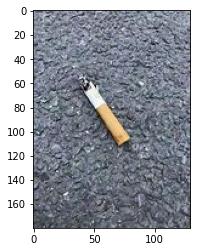

In [41]:
test_image_path = '/hzcsk12/hzcsnote/assets/images/cigarette_16.jpeg'
# test_image_path = '/raceai/data/datasets/cleaner_robot/imgs/ring/ring_1.jpg'
test_image = cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB)
plt.imshow(test_image);

In [42]:
def img2b64(path):
    with open(path, 'rb') as fr:
        b4data = base64.b64encode(fr.read()).decode()
    return b4data

reqdata = '''{
    "task": "%s",
    "cfg": {
        "pigeon": {
            "msgkey": "%s",
            "user": "1",
            "uuid": "100"
        },
        "data": {
            "class_name": "raceai.data.process.Base64DataLoader",
            "params": {
                "data_source": "%s",
                "dataset": {
                    "class_name": "raceai.data.PredictListImageDataset",
                    "params": {
                        "input_size": 224
                    }
                },
                "sample": {
                    "batch_size": 32,
                    "num_workers": 4,
                }
            }
        }
    }
}''' % (MODEL_TASK, MSGKEY, img2b64(test_image_path))

reqdata = eval(reqdata)
json.loads(requests.get(url=f'{API_POPMSG}?key={MSGKEY}').text)
json.loads(requests.post(url=API_INFERENCE, json=reqdata).text)
time.sleep(0.5)
resdata = json.loads(requests.get(url=f'{API_POPMSG}?key={MSGKEY}').text)
print(resdata)

[{'pigeon': {'msgkey': 'zmq.cr.pl.test', 'user': '1', 'uuid': '100'}, 'task': 'zmq.cr.resnet18.inference', 'errno': 0, 'result': [{'image_path': '/tmp/b4img_90.png', 'image_id': '-1', 'probs': [9.382587506934215e-08, 8.974170668807346e-06, 0.9999909400939941], 'probs_sorted': {'values': [0.9999909400939941, 8.974170668807346e-06, 9.382587506934215e-08], 'indices': [2, 1, 0]}}], 'running_time': 0.228}]
